In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1:

Null hypothesis: She is guessing and her correct answers represent random chance.

Alternate: She is able to tell the sequence of ingredients.

Step 2: 

Test Statistic: the number of times she guesses correctly.

Step 3: We look towards hypergeometric distribution to asses the problem. out of the 8(=M) cups, tea was poured first into 4(=n) of them, and then she selected 4(=N).

6 correct cups, means that 3 were picked correctly and of the 4 remaining, 3 were also in the right spot (= 3+3 => )


In [16]:
stats.hypergeom.pmf([3,4],8,4,4).sum()

0.24285714285714263

Step 4: we would need a p value below 0.05 in order to be say that the phenomenon is not just luck. Therefore, we cannot say that her claims are true based on the data.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [21]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: 

null: the sepal width of the virginica is pretty much the same as the versicolor.

alternate: the virginica sepal width is greater than that of the versicolor.

Step 2: 
Test statistic: the difference between the mean sepal widths of both species.

Step 3: P value

In [22]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [146]:
num_obs = iris_sub.num_rows
s = make_array()


for i in np.arange(10000):
    sample = iris_sub.with_columns('sampled',iris_sub.sample(num_obs, with_replacement=False).column(1))

    s = np.append(s,np.diff(sample.group(0,np.mean).column(2)))
#np.diff(sample.group(0,np.mean).column(2))
s

array([ 0.024, -0.004, -0.052, ...,  0.108,  0.084,  0.052])

(array([  19.,  122.,  608., 1891., 2766., 2536., 1480.,  466.,  103.,
           9.]),
 array([-0.24  , -0.1908, -0.1416, -0.0924, -0.0432,  0.006 ,  0.0552,
         0.1044,  0.1536,  0.2028,  0.252 ]),
 <a list of 10 Patch objects>)

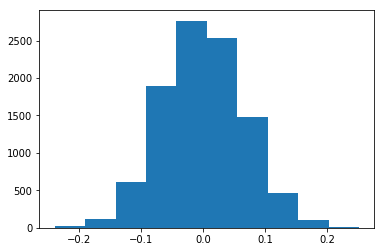

In [148]:
plt.hist(s)

In [147]:
np.mean(s>=obs)

0.0009

Step 4: Conslusion

Given the very small p_value, we must reject the null and conclude that the alternate is correct. In other terms, the virginica is larger than the versicolor.